In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def running_mean (data):
    
    out = np.zeros(len(data))
    for i in range(int(np.ceil(len(data) / 10))):
        second_mean = data[10*i:10*(i+1)].mean()
        out[10*i:10*(i+1)] = second_mean
        
    return out

def amplitude (data):
    
    diff_mask = np.zeros(len(data))
    for i in range(int(np.ceil(len(data) / 10))):
        second_diff = data[10*i:10*(i+1)].max() - data[10*i:10*(i+1)].min()
        diff_mask[10*i:10*(i+1)] = second_diff
        
    return diff_mask.mean()

def cross_count (a, b): 
    count = 0
    diff = a > b   
    for i in range(len(diff) - 1):
        if diff[i + 1] != diff[i]:
            count+=1
    return count     

def sum_stats (data):
    
    out = []
    
    x_axis = data[0::3]
    y_axis = data[1::3]
    z_axis = data[2::3]

    mean_x = x_axis.mean()
    std_x = x_axis.std()
    skew_x = scipy.stats.skew(x_axis)
    kurtosis_x = scipy.stats.kurtosis(x_axis)
    max_val_x = x_axis.max()
    min_val_x = x_axis.min()
    norm_x = np.linalg.norm(x_axis)/len(x_axis)
    
    out.append(mean_x)
    out.append(std_x)
    out.append(skew_x)
    out.append(kurtosis_x)
    out.append(max_val_x)
    out.append(min_val_x)
    out.append(norm_x)
    
    mean_y = y_axis.mean()
    std_y = y_axis.std()
    skew_y = scipy.stats.skew(y_axis)
    kurtosis_y = scipy.stats.kurtosis(y_axis)
    max_val_y = y_axis.max()
    min_val_y = y_axis.min()
    norm_y = np.linalg.norm(y_axis)/len(y_axis)
    
    out.append(mean_y)
    out.append(std_y)
    out.append(skew_y)
    out.append(kurtosis_y)
    out.append(max_val_y)
    out.append(min_val_y)
    out.append(norm_y)

    mean_z = z_axis.mean()
    std_z = z_axis.std()
    skew_z = scipy.stats.skew(z_axis)
    kurtosis_z = scipy.stats.kurtosis(z_axis)
    max_val_z = z_axis.max()
    min_val_z = z_axis.min()
    norm_z = np.linalg.norm(z_axis)/len(z_axis)
    
    out.append(mean_z)
    out.append(std_z)
    out.append(skew_z)
    out.append(kurtosis_z)
    out.append(max_val_z)
    out.append(min_val_z)
    out.append(norm_z)

    cov_xy = np.cov(x_axis, y_axis)[0][1]
    cov_xz = np.cov(x_axis, z_axis)[0][1]
    cov_yz = np.cov(y_axis, z_axis)[0][1]
    
    out.append(cov_xy) 
    out.append(cov_xz)
    out.append(cov_yz)

    cor_xy = np.corrcoef(x_axis, y_axis)[0][1]
    cor_xz = np.corrcoef(x_axis, z_axis)[0][1]
    cor_yz = np.corrcoef(y_axis, z_axis)[0][1]
    
    out.append(cor_xy) 
    out.append(cor_xz)
    out.append(cor_yz)

    mean_diff_xy = abs(mean_x-mean_y)
    mean_diff_xz = abs(mean_x-mean_z)
    mean_diff_yz = abs(mean_y-mean_z)
    
    out.append(mean_diff_xy) 
    out.append(mean_diff_xz)
    out.append(mean_diff_yz)

    std_diff_xy = abs(std_x-std_y)
    std_diff_xz = abs(std_x-std_z)
    std_diff_yz = abs(std_y-std_z)
    
    out.append(std_diff_xy) 
    out.append(std_diff_xz)
    out.append(std_diff_yz)

    DBA_x = abs(x_axis - running_mean(x_axis)).sum()
    DBA_y = abs(y_axis - running_mean(y_axis)).sum()
    DBA_z = abs(z_axis - running_mean(z_axis)).sum()
    
    out.append(DBA_x)
    out.append(DBA_y)
    out.append(DBA_z)

    ODBA = DBA_x + DBA_y + DBA_z
    
    out.append(ODBA)

    amp_x = amplitude(x_axis)
    amp_y = amplitude(y_axis)
    amp_z = amplitude(z_axis)
    
    out.append(amp_x)
    out.append(amp_y)
    out.append(amp_z)

    cross_xy = cross_count(x_axis, y_axis)
    cross_xz = cross_count(x_axis, z_axis)
    cross_yz = cross_count(y_axis, z_axis)
    
    out.append(cross_xy) 
    out.append(cross_xz)
    out.append(cross_yz)

    x_25 = np.percentile(x_axis, 25)
    x_50 = np.percentile(x_axis, 50)
    x_75 = np.percentile(x_axis, 75)
    
    out.append(x_25)
    out.append(x_50)
    out.append(x_75)

    y_25 = np.percentile(y_axis, 25)
    y_50 = np.percentile(y_axis, 50)
    y_75 = np.percentile(y_axis, 75)
    
    out.append(y_25)
    out.append(y_50)
    out.append(y_75)

    z_25 = np.percentile(z_axis, 25)
    z_50 = np.percentile(z_axis, 50)
    z_75 = np.percentile(z_axis, 75)
    
    out.append(z_25)
    out.append(z_50)
    out.append(z_75)
    
    return out

## Vulture

In [3]:
raw = pd.read_csv('./storks_obs_train.csv', header=None)

X = []
Y = []

for i in range(len(raw)):
    
    row = np.array(raw.loc[i][~raw.loc[i].isnull()])
    data = row[0:-1].astype(float)
    label = row[-1]
    
    X.append(sum_stats(data))
    Y.append(label)

In [16]:
raw[120].unique()

array(['A_FLIGHT', 'P_FLIGHT', 'WALK', 'STND', 'SITTING'], dtype=object)

In [4]:
X = np.array(X)
Y = np.array(Y)
label_names = np.unique(Y)

X = X / X.max(axis=0)
le = preprocessing.LabelEncoder()
le.fit(np.unique(Y))
Y = le.transform(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)

In [17]:
for l in raw[120].unique():
    num = len(raw.loc[raw[120] == l])
    print(l, num/len(raw))

A_FLIGHT 0.0441008018327606
P_FLIGHT 0.054982817869415807
WALK 0.2502863688430699
STND 0.49427262313860254
SITTING 0.1563573883161512


## Visualization

In [5]:
colors = ['navy', 'turquoise', 'darkorange', 'red', 'green', 'pink']

### PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

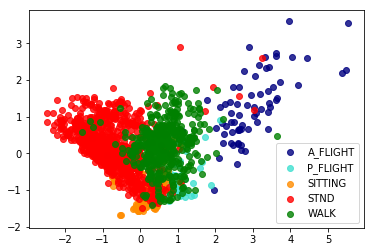

In [8]:
plt.figure()
for color, i, name in zip(colors, range(6), label_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, label=name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

### t-SNE

In [9]:
from sklearn import manifold

In [10]:
tsne = manifold.TSNE(n_components=2, init='pca')
X_r = tsne.fit_transform(X)

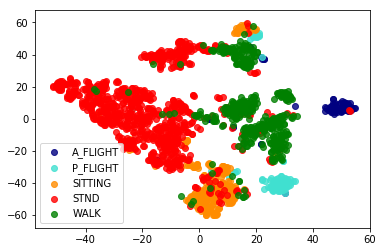

In [11]:
plt.figure()
for color, i, name in zip(colors, range(6), label_names):
    plt.scatter(X_r[Y == i, 0], X_r[Y == i, 1], color=color, alpha=.8, label=name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

## Storks, without featurization nor normalization

In [106]:
data = pd.read_csv('./storks_obs_train.csv', header=None)

X = data.drop(columns=120)
Y = data[120]

le = preprocessing.LabelEncoder()
le.fit(Y.unique())
Y = le.transform(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.8657142857142858

In [108]:
from sklearn.svm import SVC
clf = SVC(C=0.4)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.84

In [115]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.6685714285714286

In [123]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(8)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.6457142857142857

In [124]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.7714285714285715

In [125]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', activation='tanh')
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.7828571428571428

## Storks, without featurization, with normalization

In [133]:
data = pd.read_csv('./storks_obs_train.csv', header=None)

X = np.array(data.drop(columns=120))
Y = np.array(data[120])

X = X / X.max(axis=0)
le = preprocessing.LabelEncoder()
le.fit(np.unique(Y))
Y = le.transform(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)

In [134]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.8571428571428571

In [137]:
from sklearn.svm import SVC
clf = SVC(C=0.4)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.5885714285714285

In [139]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.6342857142857142

In [142]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(8)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.6171428571428571

In [144]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.7428571428571429

In [147]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', activation='tanh')
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

/Users/ranranking/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7371428571428571

## Storks, with featurization

In [126]:
raw = pd.read_csv('./storks_obs_train.csv', header=None)

X = []
Y = []

for i in range(len(raw)):
    
    row = np.array(raw.loc[i][~raw.loc[i].isnull()])
    data = row[0:-1].astype(float)
    label = row[-1]
    
    X.append(sum_stats(data))
    Y.append(label)

X = np.array(X)
Y = np.array(Y)

X = X / X.max(axis=0)
le = preprocessing.LabelEncoder()
le.fit(np.unique(Y))
Y = le.transform(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1)

In [127]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.9085714285714286

In [128]:
from sklearn.svm import SVC
clf = SVC(C=0.4)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.8228571428571428

In [129]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

/Users/ranranking/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/ranranking/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.8571428571428571

In [130]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(8)
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.88

In [131]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.8742857142857143

In [132]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam', activation='tanh')
clf = clf.fit(train_x, train_y)
pred = clf.predict(test_x)
accuracy_score(test_y, pred)

0.8971428571428571